In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [22]:
tf.test.is_gpu_available()

False

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [10]:
datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True, vertical_flip=True,shear_range=0.2,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,validation_split=0.1)


In [11]:
 train=datagen.flow_from_directory('E:\my\python_DS\ML\Fire And Smoke Detection\Dataset',
                                  target_size=(256,256),color_mode='rgb',class_mode='binary',
                                   batch_size=16,subset='training'
                                  )
Validation=datagen.flow_from_directory('E:\my\python_DS\ML\Fire And Smoke Detection\Dataset',
                                  target_size=(256,256),color_mode='rgb',class_mode='binary',
                                   batch_size=16,subset='validation'
                                  )

Found 12360 images belonging to 2 classes.
Found 1373 images belonging to 2 classes.


In [38]:
cnn=Sequential(
Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=[256,256,3]))
cnn.add(MaxPool2D(pool_size=2))

cnn.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
cnn.add(MaxPool2D(pool_size=2))

cnn.add(Conv2D(filters=256 ,kernel_size=(3,3),padding='same',activation='relu'))
cnn.add(MaxPool2D(pool_size=2))

cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))

cnn.add(Dense(1,activation='sigmoid'))

In [39]:
cnn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 64, 64, 256)       147712    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 32, 32, 256)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 262144)           

In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint
check=ModelCheckpoint('E:\my\python_DS\ML\Fire And Smoke Detection\Models',
                                                       monitor='val_loss',save_best_only=True)
callbacks=[check]
batch_size=16
cnn.compile(
optimizer='Adam',
loss='binary_crossentropy',
metrics=['accuracy']
)
cnn.fit_generator(train,validation_data=Validation,epochs=7,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=Validation.samples//batch_size,
                  callbacks=callbacks
                 )

Epoch 1/10
458/772 [================>.............] - ETA: 16:43 - loss: 0.1475 - accuracy: 0.9719

KeyboardInterrupt: 

In [58]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
cnn=load_model(r'E:\my\python_DS\ML\Fire And Smoke Detection\Models\Fire_and_Smoke.h5')

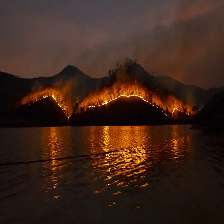

In [67]:
test=image.load_img(r'E:\my\python_DS\ML\Fire And Smoke Detection\Dataset\Fire\1.png',target_size=(224,224))
test

In [69]:
test=image.img_to_array(test)
test=test/255
test=np.expand_dims(test,axis=0)

In [72]:
r=cnn.predict_classes(test)

C:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [73]:
r

array([[0]])